In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import zipfile

##extracting the zip file
with zipfile.ZipFile("bank.zip", "r") as zip_ref:
    zip_ref.extractall("bank_data")

##loading the dataset into pandas
df = pd.read_csv("bank_data/bank.csv", sep = ';')
df.columns = df.columns.str.strip().str.replace('"', '') 
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [60]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [58]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns


In [61]:
print("y" in df.columns)

True


In [62]:
##separating features and target
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})

In [65]:
##encoding categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

In [66]:
##spliting into train, test, split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size =0.2, random_state=42
)

In [68]:
##train the decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


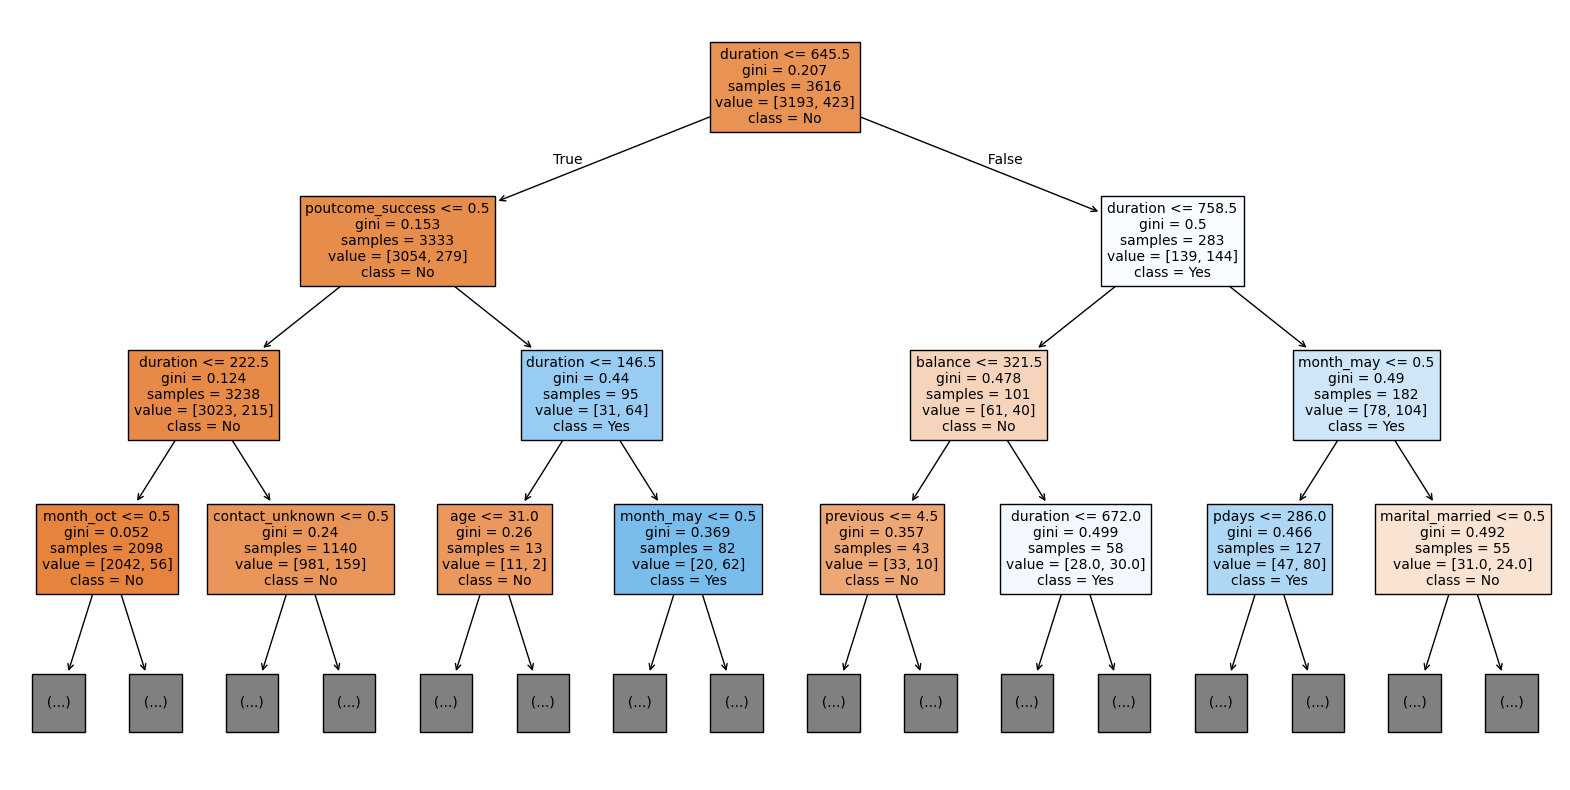

In [86]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, max_depth=3, filled=True, feature_names=X_encoded.columns, class_names=["No", "Yes"], fontsize=10)
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.9060773480662984
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.61      0.36      0.45        98

    accuracy                           0.91       905
   macro avg       0.77      0.66      0.70       905
weighted avg       0.89      0.91      0.89       905

[[785  22]
 [ 63  35]]
